<a href="https://colab.research.google.com/github/gabrielcgo/modulo03_BLUE/blob/main/Modulo3_5_projeto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 01** / *Módulo Extra*
Essa análise é uma atividade proposta pela Blue EdTech com o objetivo de aplicação prática dos conteúdos ensinados para obtenção parcial da nota (20%) do módulo Extra.

A atividade é composta por 5 questões práticas que serão resolvidas ao decorrer desta apresentação.

Os principais pontos que serão avaliados:

*   Levantamento de hipóteses
*   Manipulação de imagens
*   Criar um modelo de classificação

# Bibliotecas
*   Para ler o conjunto de imagens, ultilizamos o Os
*   Para trabalhar com Datasets, ultilizamos o Pandas
*   O Numpy para trabalhar com arrays
*   O Matplotlib para visualizar gráficos

*   PIL para processar as imagens
*   Sklearn para estatística e Machine Learning
*   Keras foi utilizado para Deep Learning
*   Tensorflow como suporte para Machine Learning e Deep learning

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, ComplementNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image_dataset
from tensorflow.keras.models import Model
from tensorflow.keras.applications import vgg19

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Starting Analysis

Efetivamente vamos iniciar a análise.

**SOBRE ESSE DATASET:**

Os dados a seguir são imagens de folhas de videiras de cinco espécies diferentes. 

O principal produto da videira são as uvas que são consumidas in natura ou processadas. Além disso, as folhas de videira são colhidas uma vez por ano como subproduto. As espécies de folhas de videira são importantes em termos de preço e sabor. Neste estudo, a classificação baseada em DL é conduzida usando imagens de folhas de videira. Para isso, foram tiradas imagens de 500 folhas de videira pertencentes a 5 espécies com um sistema especial de auto-iluminação. As espécies são:

*  Ak
*  Ala Idris
*  Büzgülü
*  Dimnit
*  Nazli

***
**CITAÇÕES:**
Koklu, M., Unlersen, M. F., Ozkan, I. A., Aslan, M. F., & Sabanci, K. (2022). A CNN-SVM study based on selected deep features for grapevine leaves classification. Measurement, 188, 110425. Doi:https://doi.org/10.1016/j.measurement.2021.110425

# 1) Implemente uma rotina de carregamento das imagens (2 pontos)

In [3]:
# Importando as imagens do dataset

ak = os.listdir('/content/drive/MyDrive/Grapes/Ak')
ala_idris = os.listdir('/content/drive/MyDrive/Grapes/Ala_Idris')
buzgulu = os.listdir('/content/drive/MyDrive/Grapes/Buzgulu')
dimnit = os.listdir('/content/drive/MyDrive/Grapes/Dimnit')
nazli = os.listdir('/content/drive/MyDrive/Grapes/Nazli')

# 2) Faça a leitura das imagens e responda (2 pontos):

a) Qual a resolução das imagens deste dataset? (0,5 ponto)

R= Todas as imagens em todos os conjuntos contém 511 x 511 pixels.

In [4]:
# Abrindo uma imagem de cada para analisar o tamanho delas

ak_size = Image.open("/content/drive/MyDrive/Grapes/Ak/Ak (1).png")
ala_idris_size = Image.open("/content/drive/MyDrive/Grapes/Ala_Idris/Ala_Idris (1).png")
buzgulu_size = Image.open("/content/drive/MyDrive/Grapes/Buzgulu/Buzgulu (1).png")
dimnit_size = Image.open("/content/drive/MyDrive/Grapes/Dimnit/Dimnit (1).png")
nazli_size = Image.open("/content/drive/MyDrive/Grapes/Nazli/Nazli (1).png")

In [5]:
print(f'Ak: {ak_size.size} pixels',
      f'\nAla Idris: {ala_idris_size.size} pixels',
      f'\nBuzgulu: {buzgulu_size.size} pixels',
      f'\nDimnit: {dimnit_size.size} pixels',
      f'\nNazli: {nazli_size.size} pixels')

Ak: (511, 511) pixels 
Ala Idris: (511, 511) pixels 
Buzgulu: (511, 511) pixels 
Dimnit: (511, 511) pixels 
Nazli: (511, 511) pixels


b) Quantas imagens por classe? (1,0 ponto)

R = 100 imagens por classe.

<BarContainer object of 5 artists>

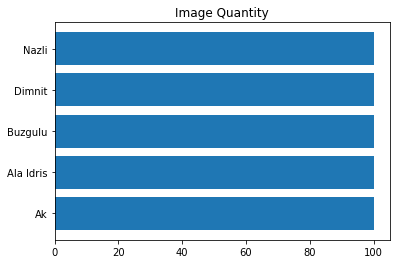

In [6]:
count_type = [len(ak),len(ala_idris),len(buzgulu),len(dimnit),len(nazli)]
title = ['Ak','Ala Idris','Buzgulu','Dimnit','Nazli']

plt.title('Image Quantity')
plt.barh(title, count_type)

In [7]:
print(count_type)

[100, 100, 100, 100, 100]


c) Este dataset já está estruturado em conjuntos treinamento/teste ou deve-se adotar alguma metodologia na modelagem? (0,5 ponto)

R = Não está separado, será necessário separar o dataset na hora de construir o modelo de predição.

# 3) Faça a preparação do dataset para extração de características com a CNN VGG-19. Qual o formato do input da rede? Verifique se há necessidade de transformação da imagem e, se sim, implemente esta transformação (1 ponto)

In [8]:
# Defini x e y como uma lista e foi necessário redimensionar para 224 x 224

x = []
y = []
img_w, img_h = 224, 224

In [9]:
for i in ak:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Ak/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(0)

In [10]:
for i in ala_idris:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Ala_Idris/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(1)

In [11]:
for i in buzgulu:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Buzgulu/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(2)

In [12]:
for i in dimnit:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Dimnit/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(3)

In [13]:
for i in nazli:
  image = Image.open(f'/content/drive/MyDrive/Grapes/Nazli/{i}').convert('RGB')
  image = image.resize((img_w, img_h))
  x.append(np.asarray(image))
  y.append(4)

In [14]:
x = np.asarray(x)
x = x.astype('float32')
x /= 255
y = np.asarray(y)

# 4) Implemente o processo de extração de características utilizando a VGG-19 e a transformação deste espaço de característica de forma adequada (2 pontos)

In [28]:
model = tf.keras.applications.VGG19(include_top = True, weights = 'imagenet', input_shape = (224, 224, 3), classes = 1000)
model = Model(inputs = model.input, outputs = model.get_layer(index=-2).output)

prediction = np.array(model.predict(x))
x_pred = np.reshape(prediction, (prediction.shape[0], prediction.shape[1]))

# 5) Utilize o espaço de características:

a) Se o conjunto não estiver particionado, escolha uma técnica e justifique sua decisão. Implemente esta rotina (1 ponto)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 100)

In [17]:
x_train.shape, x_test.shape

((350, 224, 224, 3), (150, 224, 224, 3))

In [38]:
x_train = x_train.reshape(350,224*224*3)
x_test = x_test.reshape(150,224*224*3)

b) Utilize os dados com os classificadores Árvores de Decisão e Naive-Bayes. Obtenha a acurácia dos modelos e avalie os resultados (2 pontos).

In [61]:
grid_dt = {
    'criterion' :['gini', 'entropy'],
    'random_state' : [None, 10, 20, 30, 40],
    'max_features':['auto', 'sqrt', 'log2',None],
    'max_depth': [i for i in range(1,10)],
}
dt = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = grid_dt, cv = 10)

In [62]:
estimators = [GaussianNB(), BernoulliNB(), ComplementNB()]

def gridnb(estimator, x_train, y_train, x_test, y_test):
  
  results = []
  result_pred = []
  grid_nb = {}

  for i in estimators:
    nb = GridSearchCV(estimator=i, param_grid=grid_nb, cv = 10)
    nb.fit(x_train, y_train)
    result = nb.predict(x_test)
    result_pred.append(result)
    accnb = accuracy_score(result, y_test)
    results.append(accnb)

  max_acc = max(results)
  max_acc_model = str(estimators[results.index(max_acc)]).strip('()')
  results_best_model = result_pred[results.index(max_acc)]

  return max_acc, max_acc_model, results_best_model

In [63]:
pca = PCA(n_components = .9, svd_solver = 'full')

In [ ]:
dt.fit(x_train, y_train)

In [ ]:
result = dt.predict(x_pred)

decision_tree_accuracy = accuracy_score(result, y_test)
print(f"Accuracy Decision Tree: {decision_tree_accuracy:0.2f}")